Determine the mean square displacement of a one-dimensional random walk as a function of time and confirm the expected time dependence.

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

Text(0.5, 1.0, 'Random walk simulations')

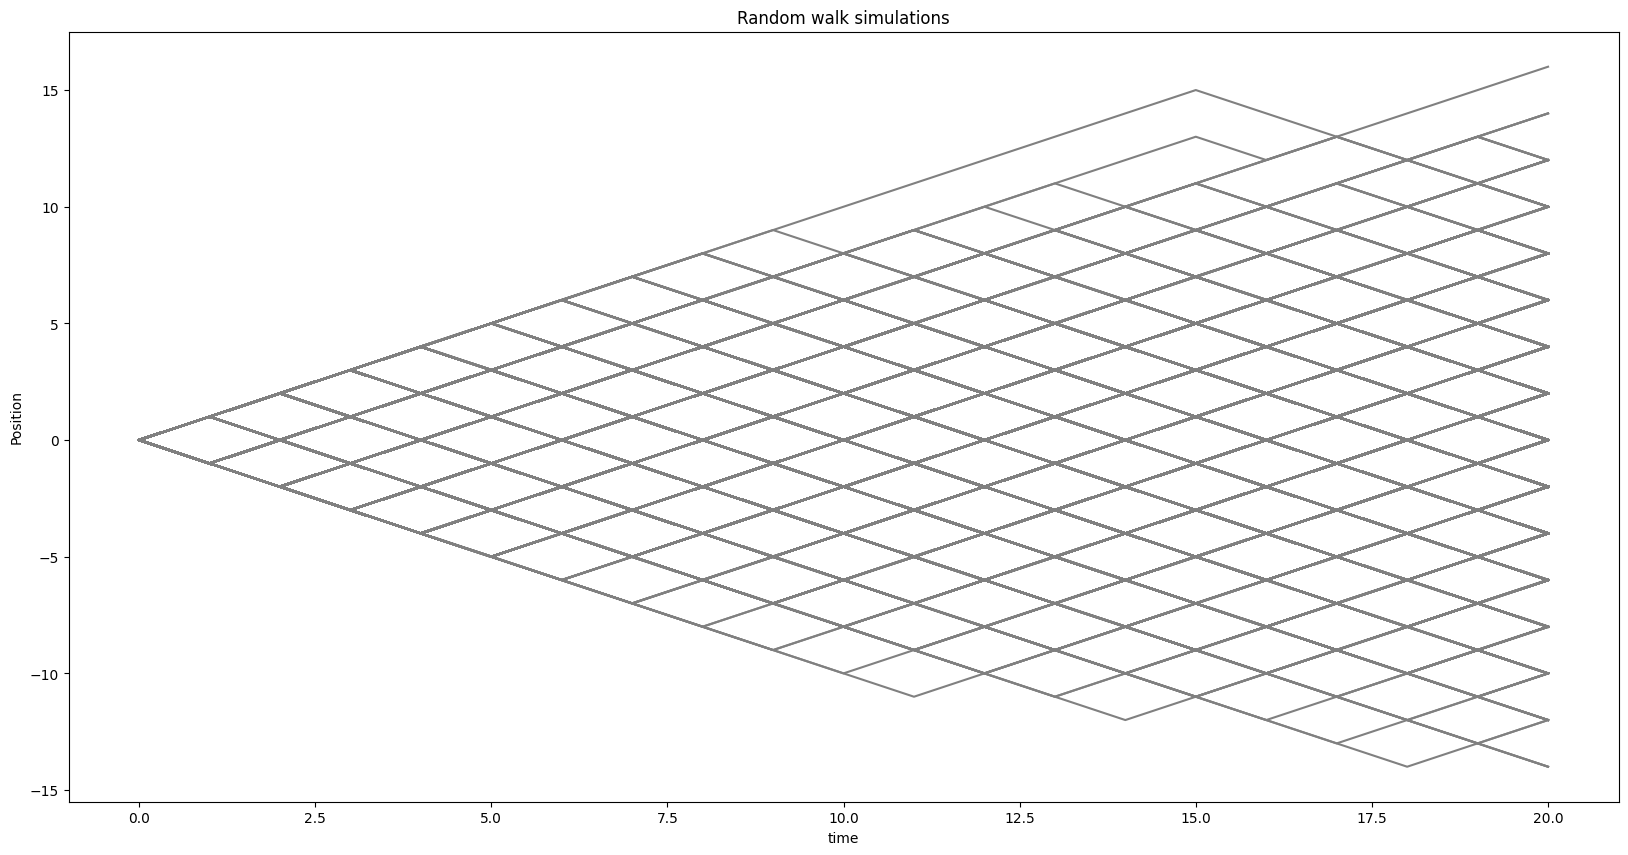

In [129]:
t_total = 20
N = 2000
list_t = np.arange(t_total+1)
random_walks = []

plt.figure(figsize=(20,10))

for i in range(N):
    np.random.seed(i)
    steps = np.random.choice([1,-1], t_total)
    position = np.cumsum(steps)
    position = np.insert(position,0,0)
    random_walks.append(position)
    plt.plot(list_t, position, "grey")


mean_displacements = {}
for t in list_t:
    displacement = [p[t] for p in random_walks]
    msd = np.mean([d**2 for d in displacement])
    mean_displacements[t] = msd

plt.xlabel("time")
plt.ylabel("Position")
plt.title("Random walk simulations")

In [130]:
random_walks = np.array(random_walks)
random_walks.shape

(2000, 21)

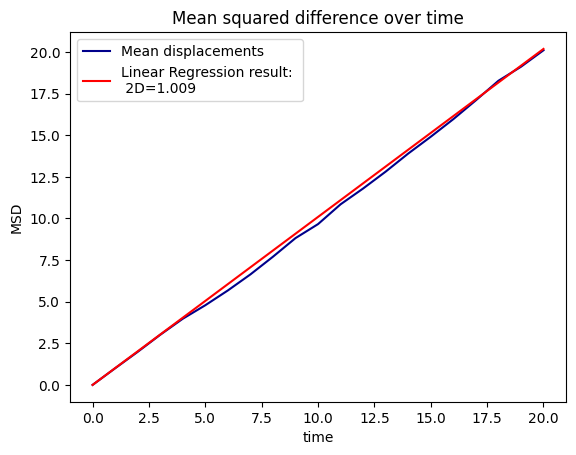

In [149]:
def MSD_theoretical(t, D):
    return np.sqrt(2*D*t)

list_msd = np.array(list(mean_displacements.values()))

def plot_msd(tlist, msdlist):
    plt.plot(tlist, msdlist, "darkblue", label="Mean displacements")
    plt.ylabel("MSD")
    plt.xlabel("time")
    plt.title("Mean squared difference over time")

    res = linregress(tlist, msdlist)
    plt.plot(tlist, res.slope*np.array(tlist),"red" , label=f"Linear Regression result: \n 2D={np.round(res.slope,3)}")

    plt.legend()
plot_msd(list_t, list_msd)

Text(0.5, 1.0, 'Position frequency after last time step')

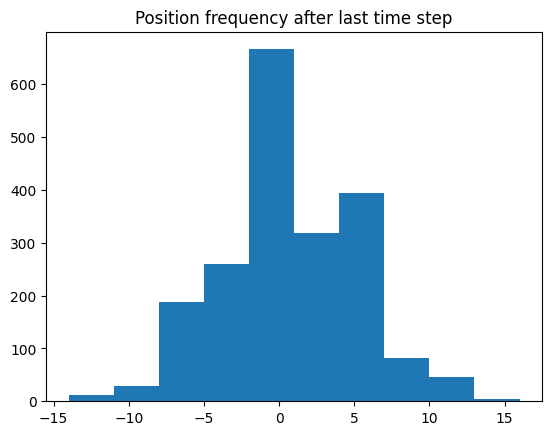

In [132]:
positions_end = [rw[-1] for rw in random_walks]
plt.hist(positions_end)
plt.title("Position frequency after last time step")

## Problem 2

b) Perform a numerical integration to generate trajectories of Brownian motion in one dimension. Plot the
position as a function of time.
c) Generate many such trajectories and calculate the mean square displacement, plot it as a function of time.

In [133]:
def em_step(t, y, dt, f, G):

    DW = np.random.normal(size=len(y))
    return y + f(t,y)*dt + np.dot(G(t,y), DW) * np.sqrt(dt)

# Params:
#
#    t_list = Sorted np.array with output times
#    y0 = initial state vector
#    dt_max = maximum step size
#    f = drift function (vector)
#    G = diffusion function (matrix)

def eulermaruyama(t_list, y0, dt_max, f, G):
    y_list = np.zeros((len(t_list), len(y0))) # List of results

    t = 0 # Current simulation time
    y = y0

    for i, T in enumerate(t_list):

        while(t < T):
            # Determine time step. Either dt_max, or shorter to
            # hit the next output point.
            dt = min(T-t, dt_max)
            y = em_step(t, y, dt, f, G)
            t += dt

        y_list[i,:] = y

    return y_list

def f(t,y):
    return 0

def G(t,y):
    return np.diag(np.ones(len(y))) * np.sqrt(2) / 10

In [134]:
y0 = np.ones(40)
t = np.linspace(0,1,100)
dt = 1e-4

y = eulermaruyama(t, y0, dt, f, G)

Text(0.5, 1.0, 'Brownian motion in 1D')

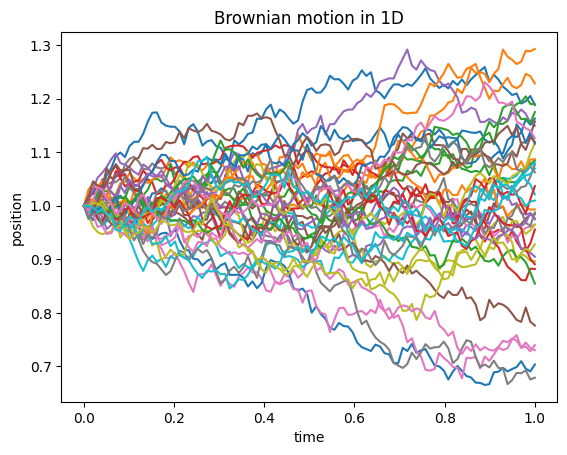

In [135]:
plt.plot(t, y)
plt.xlabel("time")
plt.ylabel("position")
plt.title("Brownian motion in 1D")

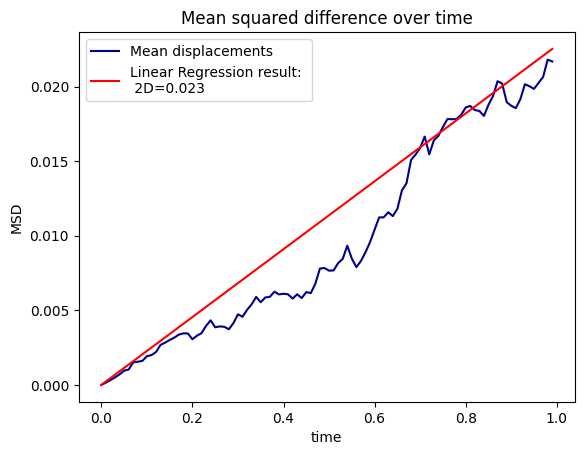

In [152]:
mean_displacements_2 = {}
for t_step in range(100):
    displacement = y[t_step, :]-1
    msd = np.mean([d**2 for d in displacement])
    mean_displacements_2[t_step] = msd
plot_msd(0.01*np.array(list(mean_displacements_2.keys())), list(mean_displacements_2.values()))

## Problem 3

Add a constant velocity to the equation of motion for Brownian motion. Determine again the mean square
displacement numerically. Identify the two regimes (use a log-log plot). You may have to try different values of
the velocity to see the two regimes well.